# Exploring Ratio Ratios in Synthetic Power Spectra

## Plans / ToDo

- Here: exploring (ad-hoc / idiosyncratically) doing ratio measures on PSDs
    - Compare simple pairwise comparisons of ratio measures between PSDs
 

- We need to tie approaches here to the real literature (make sure we are doing things in real ways)
    - Step 1: read and figure out what they are doin
        - How do they calculate: Mean vs Sum / Frequency Ranges / Calculated direct from PSDs?
        - What are normal values / ranges for the ratios themselves, and for differences measures.
    - Step 2: integrate the findigns from the literature sweep into here


- This notebook can, and should become an introductory notebook to the project
    - It will overview the methods, and can link to the most salient papers
    - It can show a couple salient examples of, for example, slope change, frequency drift, etc
    - One should be able to 'see' what we're doing here, and how it works 
        - In terms of the data generation, ratio methods, simple comparisons, and parameters of interest. 


- From here, move into setting up 'real' simulations
    - This notebook will stay as a baseline exploration, to get a feel
        - It will be used to solidify methods & approaches, and to sanity check outcomes
    - Then we move to comparing across groups, systematically and formally across parameters sets of interest

## Notes:

- *Fill this in with any interest notes from these explorations*

In [1]:
%matplotlib inline

import numpy as np

import fooof
from fooof import FOOOF
from fooof.utils import trim_spectrum

# Generate and explore pairwise comparisons

In [2]:
# Power Spectrum Settings
f_range = [3, 40]
bg_params1 = [1, 1.0]
bg_params2 = [1, 1.0]
gauss_params1 = []
gauss_params2 = []

In [3]:
# Ratio Settings
theta_range = [4, 8]
beta_range = [15, 30]

In [4]:
# Generate a couple power spectra
fs, ps1 = fooof.synth.gen_power_spectrum(f_range, bg_params1, gauss_params1)
fs, ps2 = fooof.synth.gen_power_spectrum(f_range, bg_params2, gauss_params2)

In [5]:
fm = FOOOF()

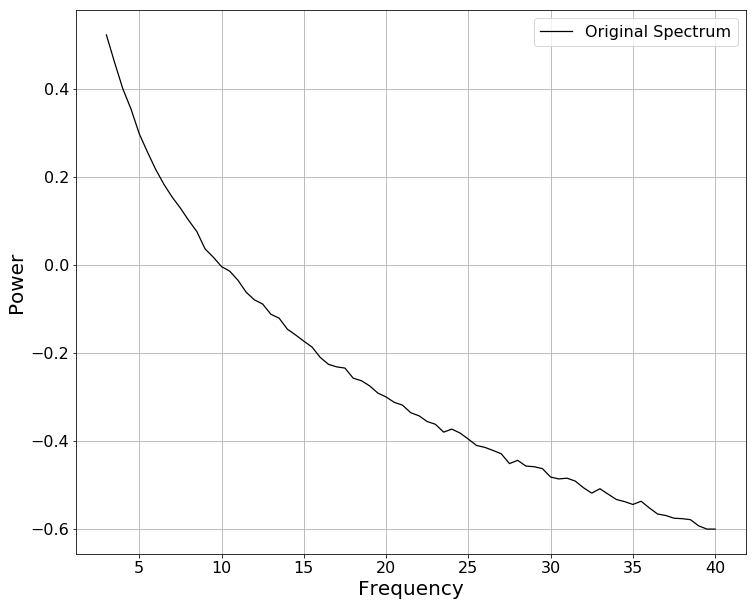

In [6]:
fm.add_data(fs, ps1)
fm.plot()

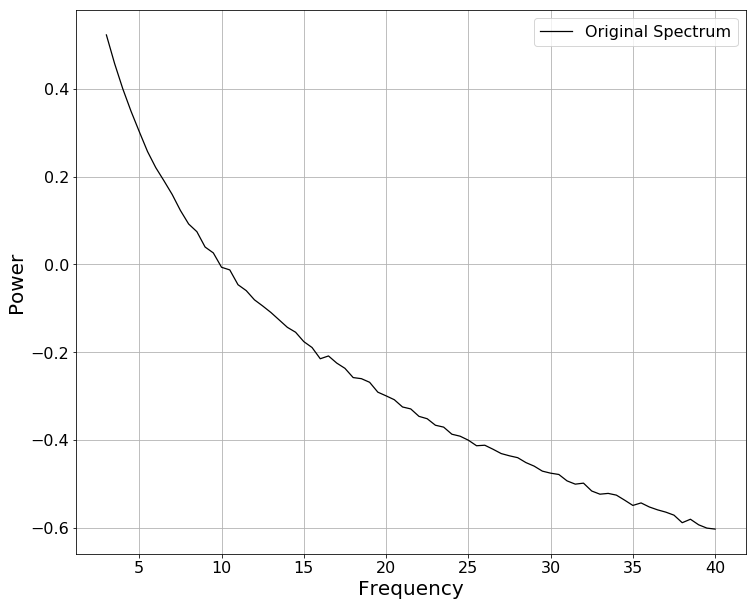

In [7]:
fm.add_data(fs, ps2)
fm.plot()

### Calculate theta / beta ratios

In [8]:
# Calculate the theta power in each PSD
_, theta1 = trim_spectrum(fs, ps1, theta_range)
_, theta2 = trim_spectrum(fs, ps2, theta_range)

# Calculate the beta power in each PSD
_, beta1 = trim_spectrum(fs, ps1, beta_range)
_, beta2 = trim_spectrum(fs, ps2, beta_range)

In [9]:
# Calculate the theta/beta ratio for each power spectrum
th_be_ratio1 = np.mean(theta1) / np.mean(beta1)
th_be_ratio2 = np.mean(theta2) / np.mean(beta2)

In [10]:
# Check the difference in theta/beta ratio between PSDs
delta_th_be = np.abs(th_be_ratio1 - th_be_ratio2)
print(delta_th_be)

0.00738285203438
